In [21]:
from cProfile import label

import numpy as np
import keras
from keras import layers
import matplotlib.pyplot as plt

# CNN #
### Load Data

In [12]:
# Model / data parameters
num_classes = 10
input_shape = (32, 32, 3)

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

### Experiment
#### Number of Convolution

Epoch 1/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.3292 - loss: 1.8807 - val_accuracy: 0.5030 - val_loss: 1.4644
Epoch 2/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4996 - loss: 1.4366 - val_accuracy: 0.5262 - val_loss: 1.3643
Epoch 3/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5417 - loss: 1.3225 - val_accuracy: 0.5808 - val_loss: 1.2521
Epoch 4/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5661 - loss: 1.2557 - val_accuracy: 0.5924 - val_loss: 1.2006
Epoch 5/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5741 - loss: 1.2173 - val_accuracy: 0.5932 - val_loss: 1.1821
Epoch 1/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 14s 38ms/step - accuracy: 0.3268 - loss: 1.8558 - val_accuracy: 0.5088 - val_loss: 1.3763
Epoch 2/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 14s 39ms/step - accuracy: 0.5214 - loss: 1.3602 - val_accuracy: 0.5562 - val_loss: 1.2617
Epoch 3/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 14s 39ms/step - accuracy: 0.5682 - loss: 1.2263 - val_accuracy:

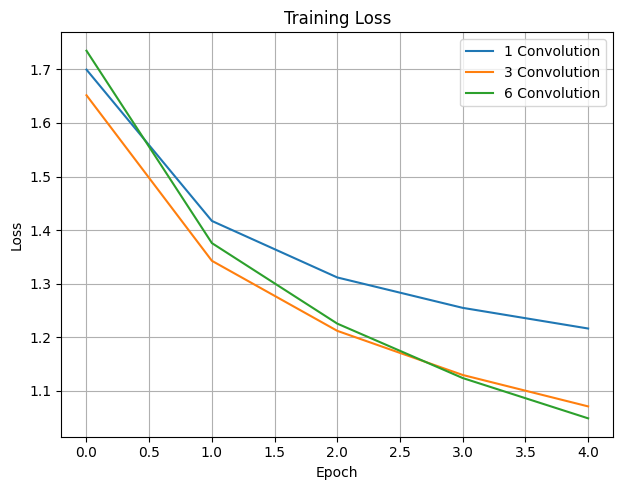

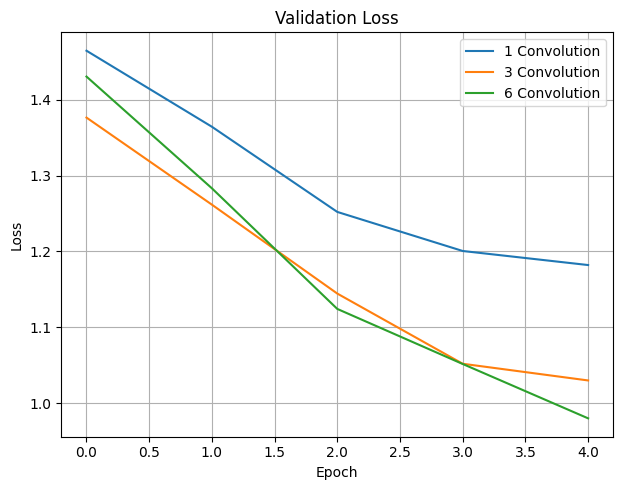

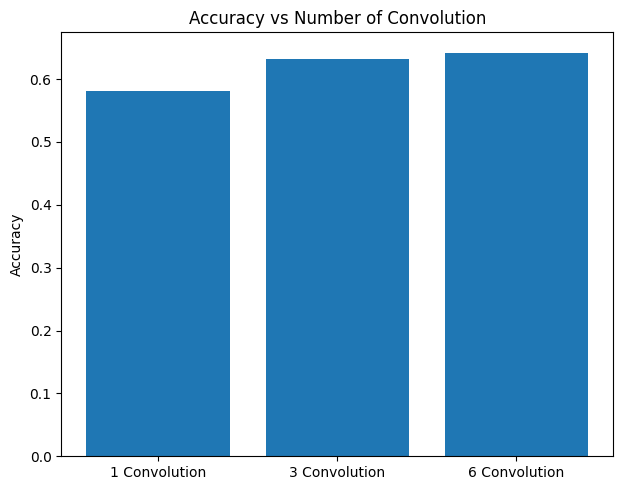

In [32]:
batch_size = 128
epochs = 5

conv = {
    "1 Convolution" : [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax")
    ], 
    "3 Convolution" : [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax")
    ],
    "6 Convolution" : [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax")

    ]
}



accuracy = []
train_loss = {}
val_loss = {}

for name, data in conv.items():
    model = keras.Sequential(data)
    model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
    train_loss[name] = history.history["loss"]
    val_loss[name] = history.history["val_loss"]
    
    score = model.evaluate(x_test, y_test, verbose=0)
    accuracy.append(score[1])  

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)

for name, tl in train_loss.items():
    plt.plot(tl, label=name)

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)

for name, tl in val_loss.items():
    plt.plot(tl, label=name)

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)

names = [name for name in conv.keys()]

plt.bar(names, accuracy)
plt.title("Accuracy vs Number of Convolution")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()

    
